In [335]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [336]:
df_status_declare = pd.read_excel('content/Данные от экспертов.xlsx', sheet_name="Статус по простоям (июль 2024)", header=10)

In [337]:
df_status_declare = df_status_declare[1:]

In [338]:
time_filter = lambda x: x[:-3]
df_status_declare['Время начала интервала'] = df_status_declare['Время начала интервала'].apply(time_filter)
df_status_declare['Время окончания интервала'] = df_status_declare['Время окончания интервала'].apply(time_filter)

In [339]:
df_raw_data = pd.read_excel('content/Данные от экспертов.xlsx', sheet_name="Raw data (июль 2024)", header=9)

In [340]:
df_raw_data = df_raw_data[1:]
df_raw_data

,Unnamed: 0,Время начала интервала,Unnamed: 2,Время окончания интервала,Длительность,Линия,Оборудование,Unnamed: 7,Статус,Unnamed: 9,Заказ,Unnamed: 11,SKU
1,NaN,01/07/2024 08:00,NaN,01/07/2024 08:13,13.4,CL4,Блок розлива (CL4),NaN,Производство > 95%,NaN,NaN,NaN,NaN
2,NaN,01/07/2024 08:13,NaN,01/07/2024 08:13,0.183333,CL4,Блок розлива (CL4),NaN,Вмешательство оператора\n,NaN,NaN,NaN,NaN
3,NaN,01/07/2024 08:13,NaN,01/07/2024 08:18,4.433333,CL4,Блок розлива (CL4),NaN,Производство > 75% < 95%,NaN,NaN,NaN,NaN
4,NaN,01/07/2024 08:18,NaN,01/07/2024 09:17,59.1,CL4,Блок розлива (CL4),NaN,Производство > 95%,NaN,NaN,NaN,NaN
5,NaN,01/07/2024 09:17,NaN,01/07/2024 09:18,1.016666,CL4,Блок розлива (CL4),NaN,Внешняя ошибка,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,NaN,31/07/2024 00:18,NaN,31/07/2024 00:48,30.016666,CL4,Блок розлива (CL4),NaN,Производство > 95%,NaN,NaN,NaN,NaN
6641,NaN,31/07/2024 00:48,NaN,31/07/2024 00:50,2,CL4,Блок розлива (CL4),NaN,Производство > 75% < 95%,NaN,NaN,NaN,NaN
6642,NaN,31/07/2024 00:50,NaN,31/07/2024 01:21,31.516666,CL4,Блок розлива (CL4),NaN,Производство > 95%,NaN,NaN,NaN,NaN
6643,NaN,31/07/2024 01:21,NaN,31/07/2024 01:22,0.316666,CL4,Блок розлива (CL4),NaN,Производство > 75% < 95%,NaN,NaN,NaN,NaN


In [341]:
df_raw_data[df_raw_data['Время начала интервала'] == '01/07/2024 11:35']

,Unnamed: 0,Время начала интервала,Unnamed: 2,Время окончания интервала,Длительность,Линия,Оборудование,Unnamed: 7,Статус,Unnamed: 9,Заказ,Unnamed: 11,SKU
36,NaN,01/07/2024 11:35,NaN,01/07/2024 11:55,20.416666,CL4,Блок розлива (CL4),NaN,Вмешательство оператора\n,NaN,NaN,NaN,NaN


In [342]:
df_raw_data[df_raw_data['Время начала интервала'] == '01/07/2024 11:55']

,Unnamed: 0,Время начала интервала,Unnamed: 2,Время окончания интервала,Длительность,Линия,Оборудование,Unnamed: 7,Статус,Unnamed: 9,Заказ,Unnamed: 11,SKU
37,NaN,01/07/2024 11:55,NaN,01/07/2024 11:59,3.6,CL4,Блок розлива (CL4),NaN,Производство < 75%,NaN,NaN,NaN,NaN


In [343]:
_merged = df_status_declare.merge(df_raw_data, on='Время начала интервала')
_merged

,Линия_x,Unnamed: 1,Дата,Смена,Время начала интервала,Время окончания интервала_x,Длительность_x,Unnamed: 7_x,Плановая длительность,Unnamed: 9_x,...,Время окончания интервала_y,Длительность_y,Линия_y,Оборудование_y,Unnamed: 7_y,Статус,Unnamed: 9_y,Заказ,Unnamed: 11,SKU
0,CL4,NaN,01/07/2024,Дневная (08:00-20:00 ),01/07/2024 11:35,01/07/2024 11:55,20.416666,NaN,NaN,NaN,...,01/07/2024 11:55,20.416666,CL4,Блок розлива (CL4),NaN,Вмешательство оператора\n,NaN,NaN,NaN,NaN
1,CL4,NaN,01/07/2024,Дневная (08:00-20:00 ),01/07/2024 15:52,01/07/2024 16:14,21.7,NaN,NaN,NaN,...,01/07/2024 15:52,0.633333,CL4,Блок розлива (CL4),NaN,Производство < 75%,NaN,NaN,NaN,NaN
2,CL4,NaN,01/07/2024,Дневная (08:00-20:00 ),01/07/2024 15:52,01/07/2024 16:14,21.7,NaN,NaN,NaN,...,01/07/2024 16:14,21.7,CL4,Блок розлива (CL4),NaN,Вмешательство оператора\n,NaN,NaN,NaN,NaN
3,CL4,NaN,01/07/2024,Дневная (08:00-20:00 ),01/07/2024 17:52,01/07/2024 18:21,29.433333,NaN,NaN,NaN,...,01/07/2024 18:21,29.433333,CL4,Блок розлива (CL4),NaN,Затор на выходе,NaN,NaN,NaN,NaN
4,CL4,NaN,01/07/2024,Дневная (08:00-20:00 ),01/07/2024 18:22,01/07/2024 18:31,8.733333,NaN,NaN,NaN,...,01/07/2024 18:31,8.733333,CL4,Блок розлива (CL4),NaN,Затор на выходе,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,CL4,NaN,30/07/2024,Ночная (20:00-08:00 ),30/07/2024 21:05,30/07/2024 21:09,3.916666,NaN,NaN,NaN,...,30/07/2024 21:05,0.183333,CL4,Блок розлива (CL4),NaN,Производство > 75% < 95%,NaN,NaN,NaN,NaN
425,CL4,NaN,30/07/2024,Ночная (20:00-08:00 ),30/07/2024 21:05,30/07/2024 21:09,3.916666,NaN,NaN,NaN,...,30/07/2024 21:09,3.916666,CL4,Блок розлива (CL4),NaN,Внешняя ошибка,NaN,NaN,NaN,NaN
426,CL4,NaN,30/07/2024,Ночная (20:00-08:00 ),30/07/2024 21:42,31/07/2024 00:08,146.95,NaN,NaN,NaN,...,31/07/2024 00:08,146.95,CL4,Блок розлива (CL4),NaN,Нехватка на входе,NaN,NaN,NaN,NaN
427,CL4,NaN,30/07/2024,Ночная (20:00-08:00 ),31/07/2024 00:09,31/07/2024 00:11,2.35,NaN,NaN,NaN,...,31/07/2024 00:11,2.35,CL4,Блок розлива (CL4),NaN,Вмешательство оператора\n,NaN,NaN,NaN,NaN


In [344]:
_merged.to_excel('content/merged.xlsx')

# Разделение таблицы статусов новых данных

In [345]:
data = pd.read_excel('content/Поломки_Блок Розлива_2020-2024v2.xlsx')
data

,Начало простоя,Конец простоя,Reason 3 (ID),Reason 3 (ENG),Описание,Длительность
0,08-янв-20 02:04:44,08-янв-20 02:08:29,2010004.0,Breakdowns,Замена двух дросселей на наполнителе №17,3.750000
1,28-янв-20 09:11:45,28-янв-20 09:20:46,2010004.0,Breakdowns,Замена первого ролика на столике №1,9.016667
2,05-фев-20 10:40:01,05-фев-20 10:42:23,2010004.0,Breakdowns,Замена нагнетательного дросселя №89,2.366667
3,06-фев-20 10:59:58,06-фев-20 11:04:09,2010004.0,Breakdowns,Замена нагнетательного дросселя №105,4.183333
4,06-фев-20 19:02:48,06-фев-20 19:05:07,2010004.0,Breakdowns,Замена тормозной пластины №76,2.316667
...,...,...,...,...,...,...
527,04-ноя-24 19:15:34,04-ноя-24 19:17:41,2010004.0,Breakdowns,Замена тормозной пластины на 66 наполнителе,2.100000
528,05-ноя-24 09:48:48,05-ноя-24 09:51:31,2010004.0,Breakdowns,замена тормозной пластины,2.716667
529,21-ноя-24 03:12:49,21-ноя-24 03:16:28,2010004.0,Breakdowns,МЕХ. Недолив. Пустые банки. 20/32/33/39,3.650000
530,21-ноя-24 03:24:45,21-ноя-24 03:28:36,2010004.0,Breakdowns,МЕХ. Недолив. Пустые банки. 20/32/33/39,3.833333


In [346]:
pattern = r'(?:Замена|устранение|не\s+работает|выбивает|залип|остановки|ремонт|заменена|замена|мех\.|кип)(.*?)(?:№|\b№№\b|#|:\s|на\s|по\s)(\d+(?:,\s*\d+)*)'

# Функция для парсинга строки
def parse_description(description):
	try:
		match = re.search(pattern, description, re.IGNORECASE)
		if match:
			element = match.group(1).strip()
			numbers = match.group(2).replace('№', '').replace('#', '').strip() 
			return element.lower(), numbers
		return None, None
	except TypeError:
		return None, None

data[["Элемент", "Номер"]] = data["Описание"].apply(lambda x: pd.Series(parse_description(x)))

# Разделяем номера, если их несколько
data = data.dropna(subset=["Номер"])  # Удаляем строки без найденных номеров
# data["Номер"] = data["Номер"].str.split(',').explode().str.strip()

# Выводим результат
print(data[["Элемент", "Номер"]])

# Сохраняем в CSV файл (если нужно)
data[["Элемент", "Номер"]].to_csv("parsed_data.csv", index=False, encoding="utf-8")

                           Элемент Номер
0    двух дросселей на наполнителе    17
1        первого ролика на столике     1
2         нагнетательного дросселя    89
3         нагнетательного дросселя   105
4               тормозной пластины    76
..                             ...   ...
504                       недолива    71
517                  тор. пластины    63
518                       дросселя    33
526             тормозной пластины    10
527             тормозной пластины    66

[243 rows x 2 columns]


In [347]:
data.drop('Описание', axis=1, inplace=True)

/tmp/ipykernel_114447/2089630613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Описание', axis=1, inplace=True)


In [348]:
len(data['Элемент'].unique())

74

In [349]:
# Проведём анализ того, насколько долго при каждом элементе происходил простой

sorted_data = data.sort_values(by='Длительность', ascending=False)

<Axes: xlabel='Длительность', ylabel='Элемент'>

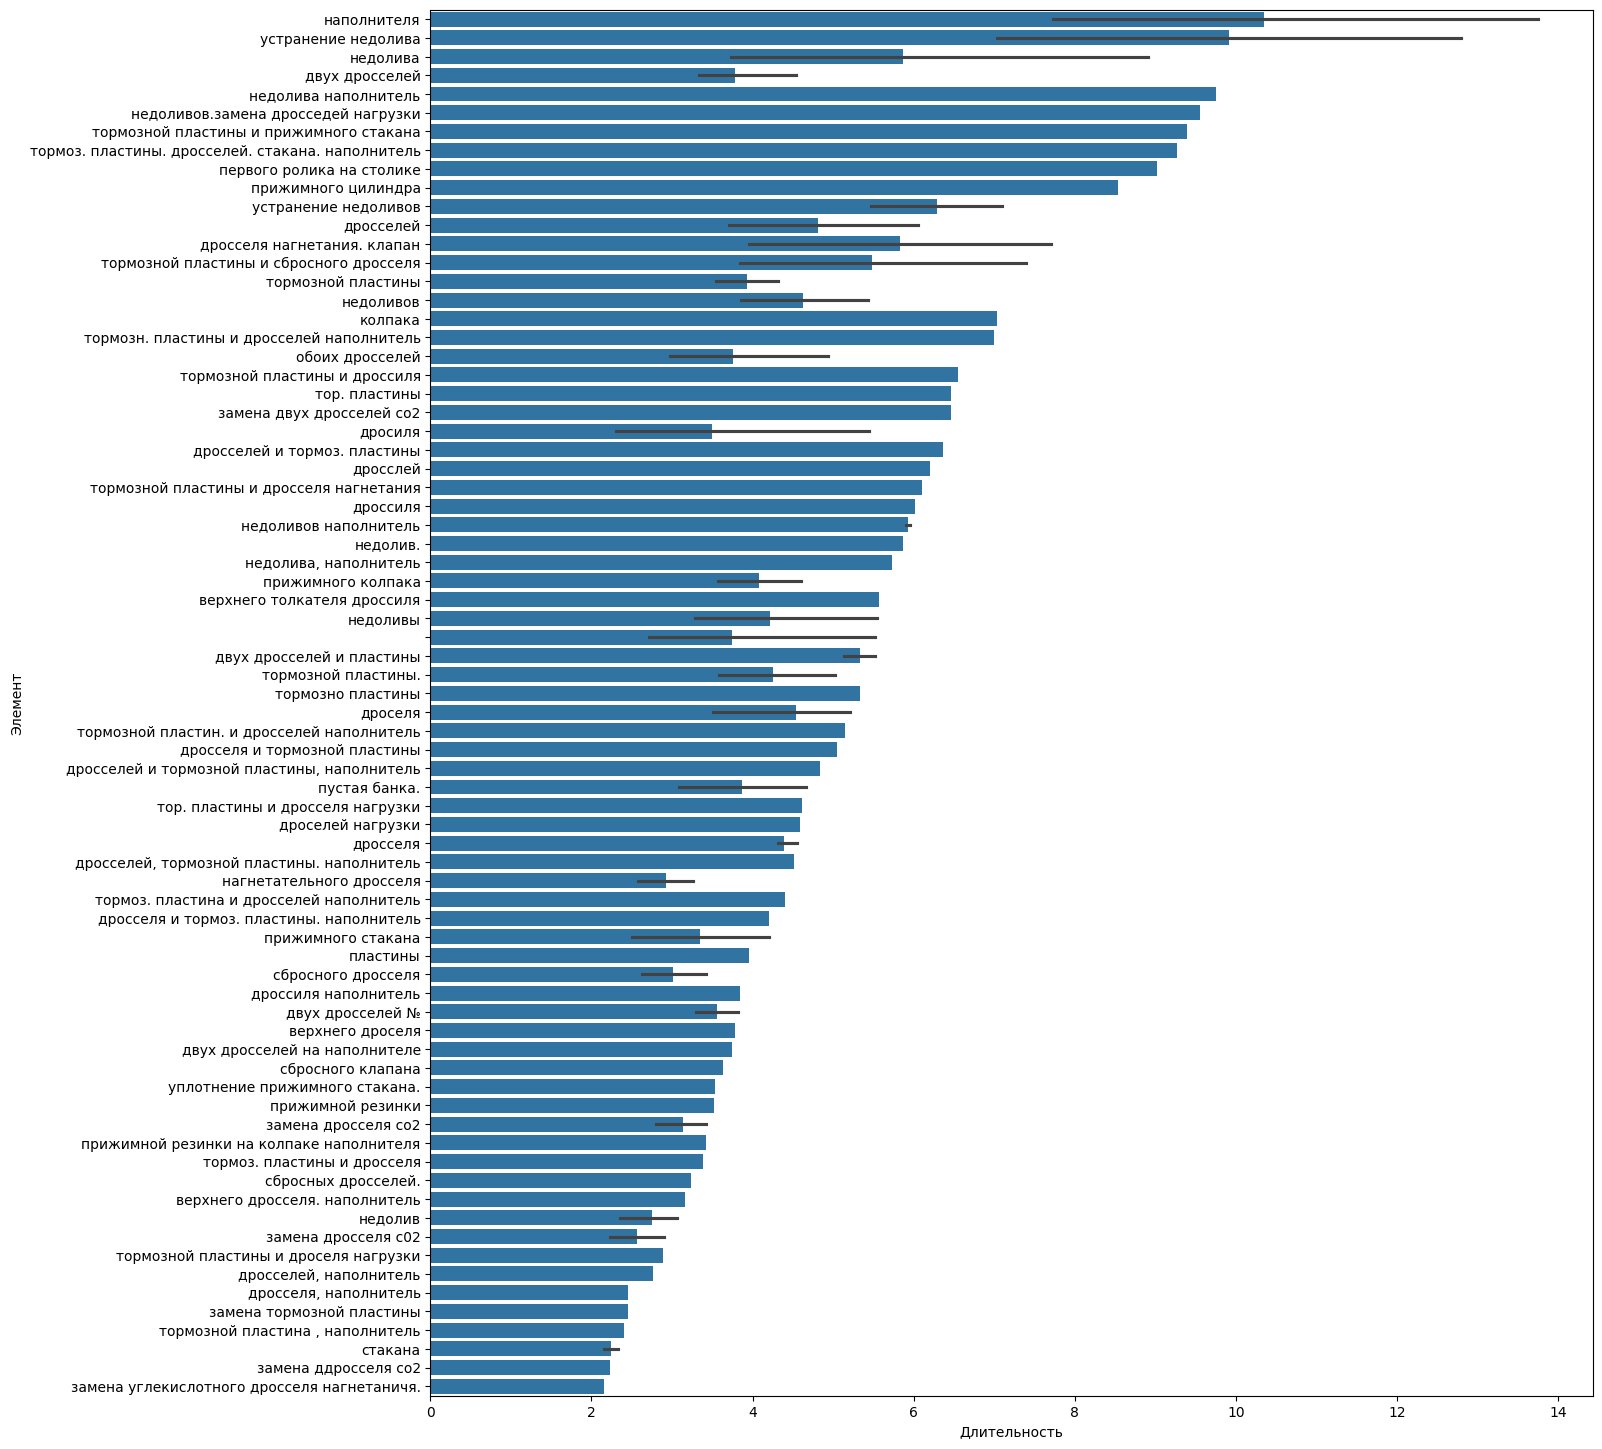

In [350]:
plt.figure(figsize=(15,18))
sns.barplot(x='Длительность', y='Элемент', data=sorted_data)


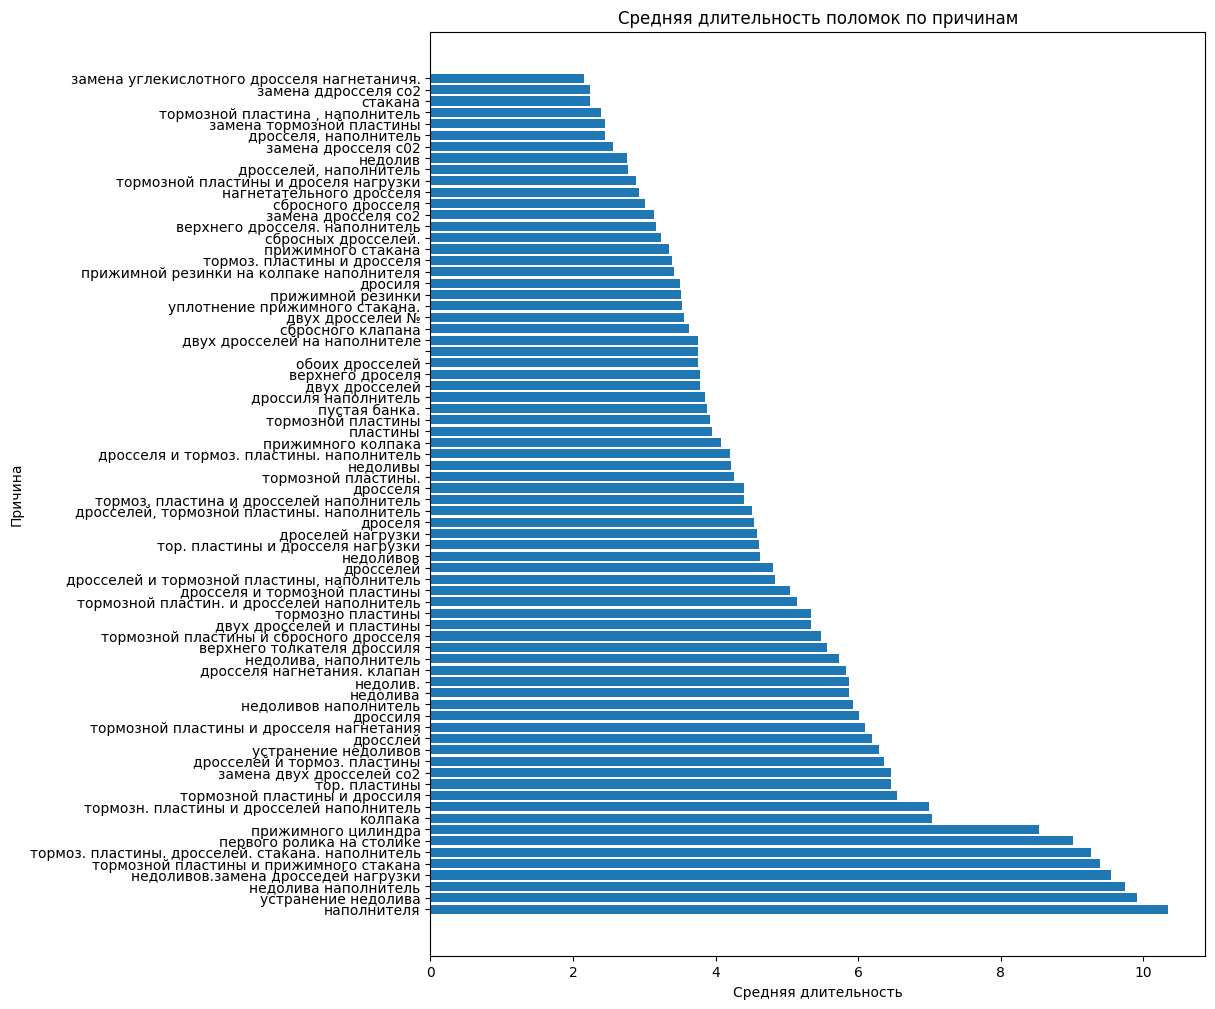

Топ-10 причин по средней длительности:
                                              Элемент  Длительность
32                                        наполнителя     10.355556
72                                устранение недолива      9.916667
36                               недолива наполнитель      9.750000
40                недоливов.замена дросседей нагрузки      9.550000
68            тормозной пластины и прижимного стакана      9.400000
59  тормоз. пластины. дросселей. стакана. наполнитель      9.266667
43                          первого ролика на столике      9.016667
47                                прижимного цилиндра      8.533333
30                                            колпака      7.033333
60          тормозн. пластины и дросселей наполнитель      7.000000


In [351]:
grouped = data.groupby('Элемент')['Длительность'].mean().reset_index()

# Сортировка по средней длительности
sorted_grouped = grouped.sort_values(by='Длительность', ascending=False)

# Визуализация
plt.figure(figsize=(10, 12))
plt.barh(sorted_grouped['Элемент'], sorted_grouped['Длительность'])
plt.xlabel('Средняя длительность')
plt.ylabel('Причина')
plt.title('Средняя длительность поломок по причинам')
plt.show()

# Топ-10 причин по средней длительности
top_10 = sorted_grouped.head(10)
print("Топ-10 причин по средней длительности:")
print(top_10)

In [352]:
# выполним кластеризацию данных по длительности
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data[['Длительность']])
data['cluster'] = kmeans.predict(data[['Длительность']])
data

/tmp/ipykernel_114447/3569028396.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.predict(data[['Длительность']])


,Начало простоя,Конец простоя,Reason 3 (ID),Reason 3 (ENG),Длительность,Элемент,Номер,cluster
0,08-янв-20 02:04:44,08-янв-20 02:08:29,2010004.0,Breakdowns,3.750000,двух дросселей на наполнителе,17,1
1,28-янв-20 09:11:45,28-янв-20 09:20:46,2010004.0,Breakdowns,9.016667,первого ролика на столике,1,2
2,05-фев-20 10:40:01,05-фев-20 10:42:23,2010004.0,Breakdowns,2.366667,нагнетательного дросселя,89,1
3,06-фев-20 10:59:58,06-фев-20 11:04:09,2010004.0,Breakdowns,4.183333,нагнетательного дросселя,105,1
4,06-фев-20 19:02:48,06-фев-20 19:05:07,2010004.0,Breakdowns,2.316667,тормозной пластины,76,1
...,...,...,...,...,...,...,...,...
504,08-фев-24 00:56:06,08-фев-24 01:01:53,2010004.0,Breakdowns,5.766667,недолива,71,0
517,19-сен-24 00:21:31,19-сен-24 00:28:00,2010004.0,Breakdowns,6.466667,тор. пластины,63,0
518,19-сен-24 00:30:19,19-сен-24 00:34:53,2010004.0,Breakdowns,4.550000,дросселя,33,0
526,04-ноя-24 16:04:20,04-ноя-24 16:07:21,2010004.0,Breakdowns,3.016667,тормозной пластины,10,1


In [353]:
data.to_excel('content/clusterized.xlsx')

In [354]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [355]:
labels

array([1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1,
       1], dtype=int32)

In [356]:
sorted_data = data.sort_values(by='Длительность', ascending=False)

/tmp/ipykernel_114447/894940618.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=color, label=f'Кластер {cluster}')


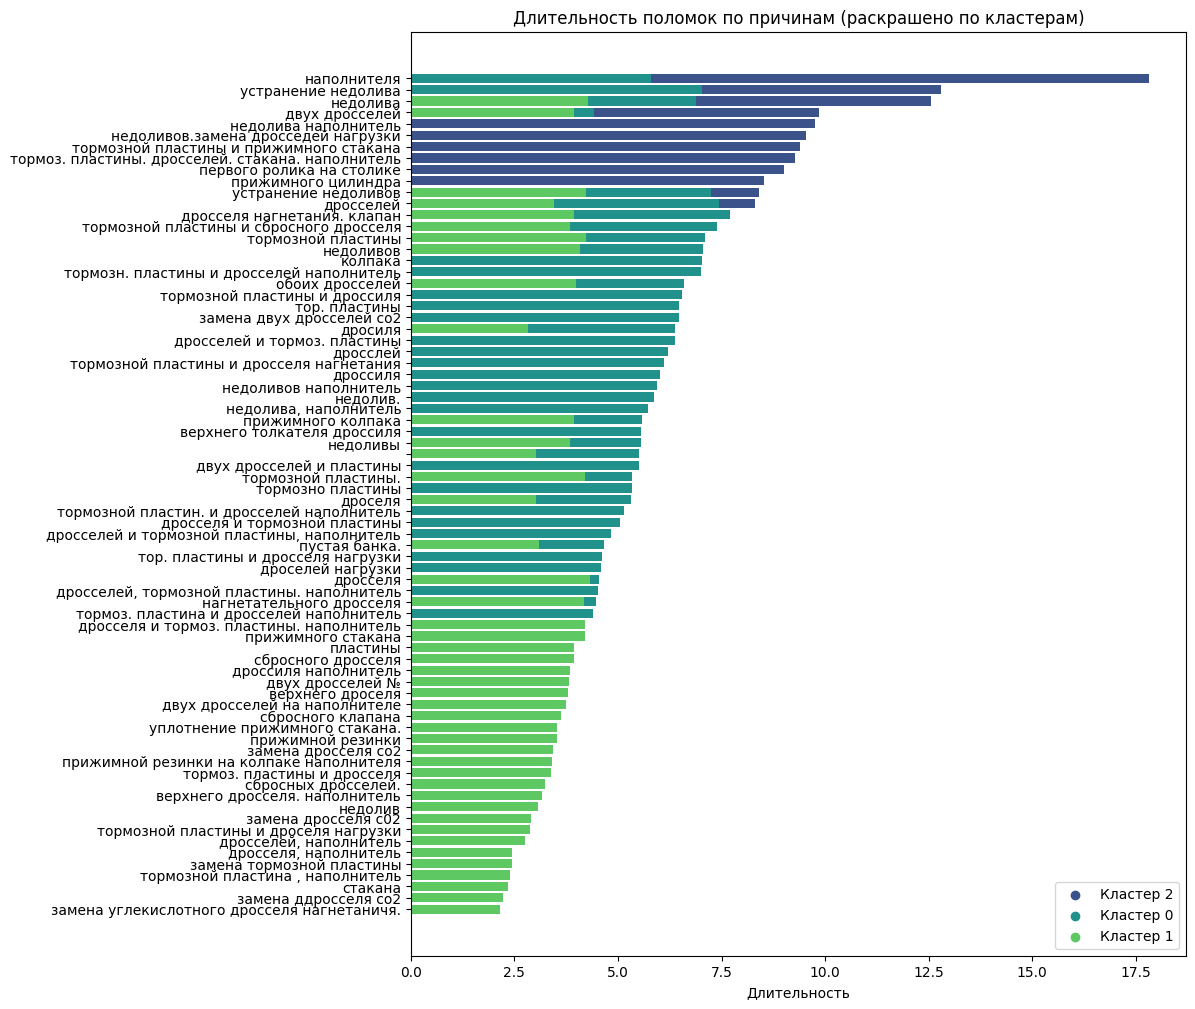

In [357]:
colors = sns.color_palette('viridis', n_colors=len(sorted_data['cluster'].unique()))

color_dict = {cluster: colors[i] for i, cluster in enumerate(sorted_data['cluster'].unique())}

bar_colors = [color_dict[cluster] for cluster in sorted_data['cluster']]

plt.figure(figsize=(10, 12))
plt.barh(sorted_data['Элемент'], sorted_data['Длительность'], color=bar_colors)
plt.xlabel('Длительность')
plt.title('Длительность поломок по причинам (раскрашено по кластерам)')
plt.gca().invert_yaxis()  

for cluster, color in color_dict.items():
    plt.scatter([], [], c=color, label=f'Кластер {cluster}')
plt.legend()
plt.show()

In [358]:
grouped_data = data.groupby('cluster')['Длительность'].mean()
grouped_data

cluster
0     5.602675
1     3.181621
2    10.234375
Name: Длительность, dtype: float64

In [359]:
group_by_sum = data.groupby('cluster')['Длительность'].sum()
group_by_sum

cluster
0    453.816667
1    464.516667
2    163.750000
Name: Длительность, dtype: float64

<Axes: xlabel='Длительность', ylabel='Длительность'>

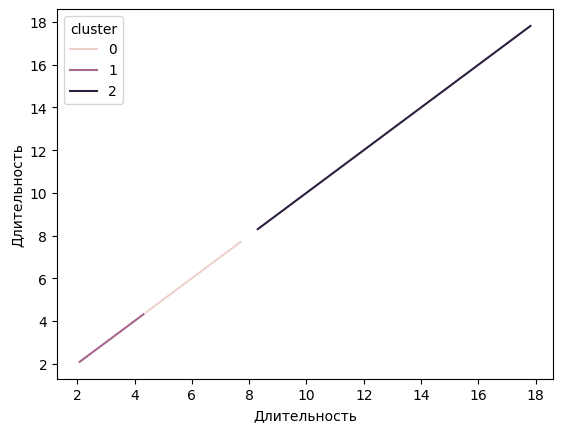

In [360]:
sns.lineplot(x='Длительность', y='Длительность', hue='cluster', data=data)

<Axes: xlabel='Длительность', ylabel='Длительность'>

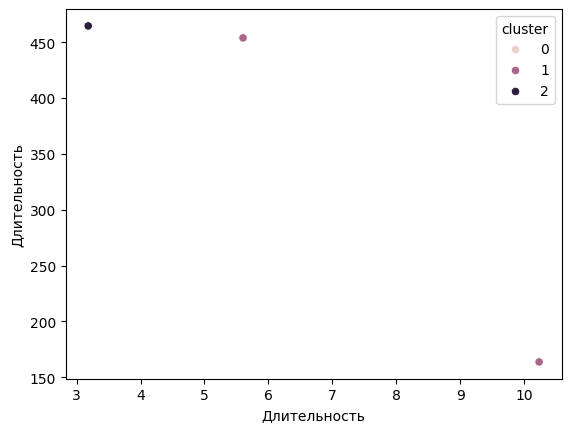

In [361]:
sns.scatterplot(x=data.groupby('cluster')['Длительность'].mean(), y=data.groupby('cluster')['Длительность'].sum(), hue='cluster', data=data)

`Так как кластера всего 3, то 3 точки на графике показывают зависимость суммарной длительности времени простоя от среднего времени простоя по кластеру`

Элементы, `замена которых занимает меньше всего` времени работы конвейра `ломаются чаще всего`

Оценим параметры, которые входят в каждый кластер

In [362]:
data[data['cluster'] == 1]['Элемент']

0       двух дросселей на наполнителе
2            нагнетательного дросселя
3            нагнетательного дросселя
4                  тормозной пластины
7                 тормозной пластины.
                    ...              
500    верхнего дросселя. наполнитель
501                         недоливов
502                         недоливов
526                тормозной пластины
527                тормозной пластины
Name: Элемент, Length: 146, dtype: object

Введём маркеры времени суток (утро, день, вечер, ночь)

Утро: 06:00 - 12:00  
День: 12:00 - 18:00  
Вечер: 18:00 - 24:00  
Ночь: 00:00 - 06:00  

In [363]:

data['Начало простоя (часы)'] = data['Начало простоя'].apply(lambda x: x.split(' ')[1])
data['Начало простоя (часы)'] = pd.to_datetime(data['Начало простоя (часы)'])

def get_time_of_day(time):
    hour = time.hour
    if 6 <= hour < 12:
        return 'Утро'
    elif 12 <= hour < 18:
        return 'День'
    elif 18 <= hour < 24:
        return 'Вечер'
    else:
        return 'Ночь'


data['Время суток'] = data['Начало простоя (часы)'].apply(lambda x: get_time_of_day(x))
data

/tmp/ipykernel_114447/2559687569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Начало простоя (часы)'] = data['Начало простоя'].apply(lambda x: x.split(' ')[1])
/tmp/ipykernel_114447/2559687569.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Начало простоя (часы)'] = pd.to_datetime(data['Начало простоя (часы)'])
/tmp/ipykernel_114447/2559687569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,Начало простоя,Конец простоя,Reason 3 (ID),Reason 3 (ENG),Длительность,Элемент,Номер,cluster,Начало простоя (часы),Время суток
0,08-янв-20 02:04:44,08-янв-20 02:08:29,2010004.0,Breakdowns,3.750000,двух дросселей на наполнителе,17,1,2025-02-22 02:04:44,Ночь
1,28-янв-20 09:11:45,28-янв-20 09:20:46,2010004.0,Breakdowns,9.016667,первого ролика на столике,1,2,2025-02-22 09:11:45,Утро
2,05-фев-20 10:40:01,05-фев-20 10:42:23,2010004.0,Breakdowns,2.366667,нагнетательного дросселя,89,1,2025-02-22 10:40:01,Утро
3,06-фев-20 10:59:58,06-фев-20 11:04:09,2010004.0,Breakdowns,4.183333,нагнетательного дросселя,105,1,2025-02-22 10:59:58,Утро
4,06-фев-20 19:02:48,06-фев-20 19:05:07,2010004.0,Breakdowns,2.316667,тормозной пластины,76,1,2025-02-22 19:02:48,Вечер
...,...,...,...,...,...,...,...,...,...,...
504,08-фев-24 00:56:06,08-фев-24 01:01:53,2010004.0,Breakdowns,5.766667,недолива,71,0,2025-02-22 00:56:06,Ночь
517,19-сен-24 00:21:31,19-сен-24 00:28:00,2010004.0,Breakdowns,6.466667,тор. пластины,63,0,2025-02-22 00:21:31,Ночь
518,19-сен-24 00:30:19,19-сен-24 00:34:53,2010004.0,Breakdowns,4.550000,дросселя,33,0,2025-02-22 00:30:19,Ночь
526,04-ноя-24 16:04:20,04-ноя-24 16:07:21,2010004.0,Breakdowns,3.016667,тормозной пластины,10,1,2025-02-22 16:04:20,День


In [364]:
# Произведём 0ne-hot кодирование признаков времени суток
one_hotting_df = pd.get_dummies(data['Время суток'])
one_hotting_df

,Вечер,День,Ночь,Утро
0,False,False,True,False
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,True,False,False,False
...,...,...,...,...
504,False,False,True,False
517,False,False,True,False
518,False,False,True,False
526,False,True,False,False


In [365]:
data.drop('Время суток', axis=1, inplace=True)
data = pd.concat([data, one_hotting_df], axis=1)
data

/tmp/ipykernel_114447/4231584830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Время суток', axis=1, inplace=True)


,Начало простоя,Конец простоя,Reason 3 (ID),Reason 3 (ENG),Длительность,Элемент,Номер,cluster,Начало простоя (часы),Вечер,День,Ночь,Утро
0,08-янв-20 02:04:44,08-янв-20 02:08:29,2010004.0,Breakdowns,3.750000,двух дросселей на наполнителе,17,1,2025-02-22 02:04:44,False,False,True,False
1,28-янв-20 09:11:45,28-янв-20 09:20:46,2010004.0,Breakdowns,9.016667,первого ролика на столике,1,2,2025-02-22 09:11:45,False,False,False,True
2,05-фев-20 10:40:01,05-фев-20 10:42:23,2010004.0,Breakdowns,2.366667,нагнетательного дросселя,89,1,2025-02-22 10:40:01,False,False,False,True
3,06-фев-20 10:59:58,06-фев-20 11:04:09,2010004.0,Breakdowns,4.183333,нагнетательного дросселя,105,1,2025-02-22 10:59:58,False,False,False,True
4,06-фев-20 19:02:48,06-фев-20 19:05:07,2010004.0,Breakdowns,2.316667,тормозной пластины,76,1,2025-02-22 19:02:48,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,08-фев-24 00:56:06,08-фев-24 01:01:53,2010004.0,Breakdowns,5.766667,недолива,71,0,2025-02-22 00:56:06,False,False,True,False
517,19-сен-24 00:21:31,19-сен-24 00:28:00,2010004.0,Breakdowns,6.466667,тор. пластины,63,0,2025-02-22 00:21:31,False,False,True,False
518,19-сен-24 00:30:19,19-сен-24 00:34:53,2010004.0,Breakdowns,4.550000,дросселя,33,0,2025-02-22 00:30:19,False,False,True,False
526,04-ноя-24 16:04:20,04-ноя-24 16:07:21,2010004.0,Breakdowns,3.016667,тормозной пластины,10,1,2025-02-22 16:04:20,False,True,False,False


In [366]:
# Приведём время начала поломки в datetime
kv = {
    'сен':'09',
    'окт':'10',
    'ноя':'11',
    'дек':'12',
    'янв':'01',
    'фев':'02',
    'мар':'03',
    'апр':'04',
    'май':'05',
    'июн':'06',
    'июл':'07',
    'авг':'08',
}

def replace_month(date_str):
    for month_abbr, month_num in kv.items():
        date_str = date_str.replace(month_abbr, month_num)
    return date_str


data['Начало простоя'] = data['Начало простоя'].apply(replace_month)
data['Конец простоя'] = data['Конец простоя'].apply(replace_month)


data['Начало простоя'] = pd.to_datetime(data['Начало простоя'], format='%d-%m-%y %H:%M:%S')
data['Конец простоя'] = pd.to_datetime(data['Конец простоя'], format='%d-%m-%y %H:%M:%S')

In [367]:
# отсортируем по времени начала простоя


In [368]:
# Введём в таблицу величину времени, прошедшего с последней поломки
data['Время с последней поломки'] = data['Начало простоя'] - data['Начало простоя'].shift(1)
data['Время с последней поломки'] = data['Время с последней поломки'].fillna(0)
data


,Начало простоя,Конец простоя,Reason 3 (ID),Reason 3 (ENG),Длительность,Элемент,Номер,cluster,Начало простоя (часы),Вечер,День,Ночь,Утро,Время с последней поломки
0,2020-01-08 02:04:44,2020-01-08 02:08:29,2010004.0,Breakdowns,3.750000,двух дросселей на наполнителе,17,1,2025-02-22 02:04:44,False,False,True,False,0
1,2020-01-28 09:11:45,2020-01-28 09:20:46,2010004.0,Breakdowns,9.016667,первого ролика на столике,1,2,2025-02-22 09:11:45,False,False,False,True,20 days 07:07:01
2,2020-02-05 10:40:01,2020-02-05 10:42:23,2010004.0,Breakdowns,2.366667,нагнетательного дросселя,89,1,2025-02-22 10:40:01,False,False,False,True,8 days 01:28:16
3,2020-02-06 10:59:58,2020-02-06 11:04:09,2010004.0,Breakdowns,4.183333,нагнетательного дросселя,105,1,2025-02-22 10:59:58,False,False,False,True,1 days 00:19:57
4,2020-02-06 19:02:48,2020-02-06 19:05:07,2010004.0,Breakdowns,2.316667,тормозной пластины,76,1,2025-02-22 19:02:48,True,False,False,False,0 days 08:02:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,2024-02-08 00:56:06,2024-02-08 01:01:53,2010004.0,Breakdowns,5.766667,недолива,71,0,2025-02-22 00:56:06,False,False,True,False,0 days 02:44:21
517,2024-09-19 00:21:31,2024-09-19 00:28:00,2010004.0,Breakdowns,6.466667,тор. пластины,63,0,2025-02-22 00:21:31,False,False,True,False,223 days 23:25:25
518,2024-09-19 00:30:19,2024-09-19 00:34:53,2010004.0,Breakdowns,4.550000,дросселя,33,0,2025-02-22 00:30:19,False,False,True,False,0 days 00:08:48
526,2024-11-04 16:04:20,2024-11-04 16:07:21,2010004.0,Breakdowns,3.016667,тормозной пластины,10,1,2025-02-22 16:04:20,False,True,False,False,46 days 15:34:01


In [369]:
# построим гистограмму распределений
# Среднее время между поломками
# Преобразование строки в timedelta и извлечение количества дней
data['Время с последней поломки'] = pd.to_timedelta(data['Время с последней поломки'])
data['Дни с последней поломки'] = data['Время с последней поломки'].dt.days
frequency = data['Дни с последней поломки'].value_counts().sort_index()


In [370]:
# с нулём неинформативно
data

,Начало простоя,Конец простоя,Reason 3 (ID),Reason 3 (ENG),Длительность,Элемент,Номер,cluster,Начало простоя (часы),Вечер,День,Ночь,Утро,Время с последней поломки,Дни с последней поломки
0,2020-01-08 02:04:44,2020-01-08 02:08:29,2010004.0,Breakdowns,3.750000,двух дросселей на наполнителе,17,1,2025-02-22 02:04:44,False,False,True,False,0 days 00:00:00,0
1,2020-01-28 09:11:45,2020-01-28 09:20:46,2010004.0,Breakdowns,9.016667,первого ролика на столике,1,2,2025-02-22 09:11:45,False,False,False,True,20 days 07:07:01,20
2,2020-02-05 10:40:01,2020-02-05 10:42:23,2010004.0,Breakdowns,2.366667,нагнетательного дросселя,89,1,2025-02-22 10:40:01,False,False,False,True,8 days 01:28:16,8
3,2020-02-06 10:59:58,2020-02-06 11:04:09,2010004.0,Breakdowns,4.183333,нагнетательного дросселя,105,1,2025-02-22 10:59:58,False,False,False,True,1 days 00:19:57,1
4,2020-02-06 19:02:48,2020-02-06 19:05:07,2010004.0,Breakdowns,2.316667,тормозной пластины,76,1,2025-02-22 19:02:48,True,False,False,False,0 days 08:02:50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,2024-02-08 00:56:06,2024-02-08 01:01:53,2010004.0,Breakdowns,5.766667,недолива,71,0,2025-02-22 00:56:06,False,False,True,False,0 days 02:44:21,0
517,2024-09-19 00:21:31,2024-09-19 00:28:00,2010004.0,Breakdowns,6.466667,тор. пластины,63,0,2025-02-22 00:21:31,False,False,True,False,223 days 23:25:25,223
518,2024-09-19 00:30:19,2024-09-19 00:34:53,2010004.0,Breakdowns,4.550000,дросселя,33,0,2025-02-22 00:30:19,False,False,True,False,0 days 00:08:48,0
526,2024-11-04 16:04:20,2024-11-04 16:07:21,2010004.0,Breakdowns,3.016667,тормозной пластины,10,1,2025-02-22 16:04:20,False,True,False,False,46 days 15:34:01,46


In [371]:
data.to_excel('content/with_freq.xlsx')

Топ-10 наиболее часто встречающихся причин поломок:
Элемент
тормозной пластины          39
нагнетательного дросселя    21
двух дросселей              19
недоливов                   15
прижимного колпака          10
дросселей                    9
сбросного дросселя           8
устранение недоливов         8
недолива                     6
обоих дросселей              6
Name: count, dtype: int64


/tmp/ipykernel_114447/3081026864.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_elements.values, y=top_10_elements.index, palette='viridis')


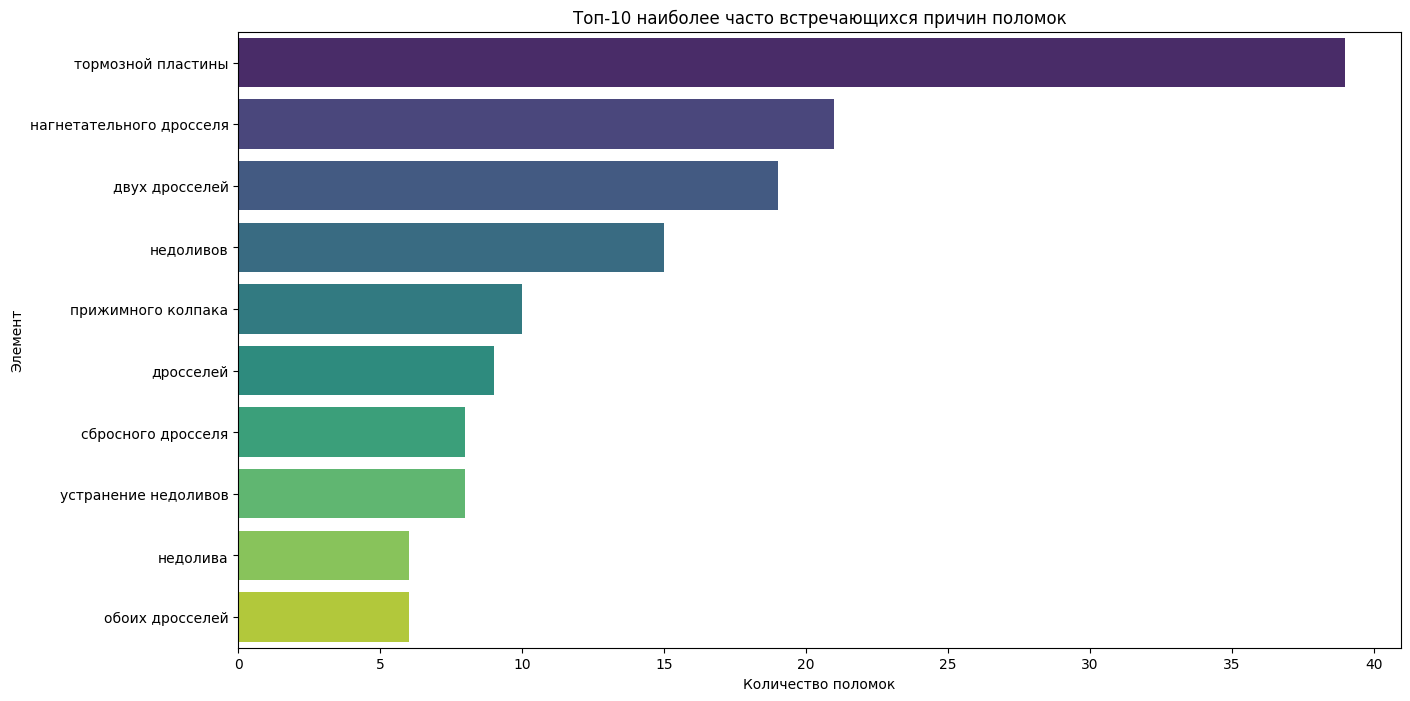

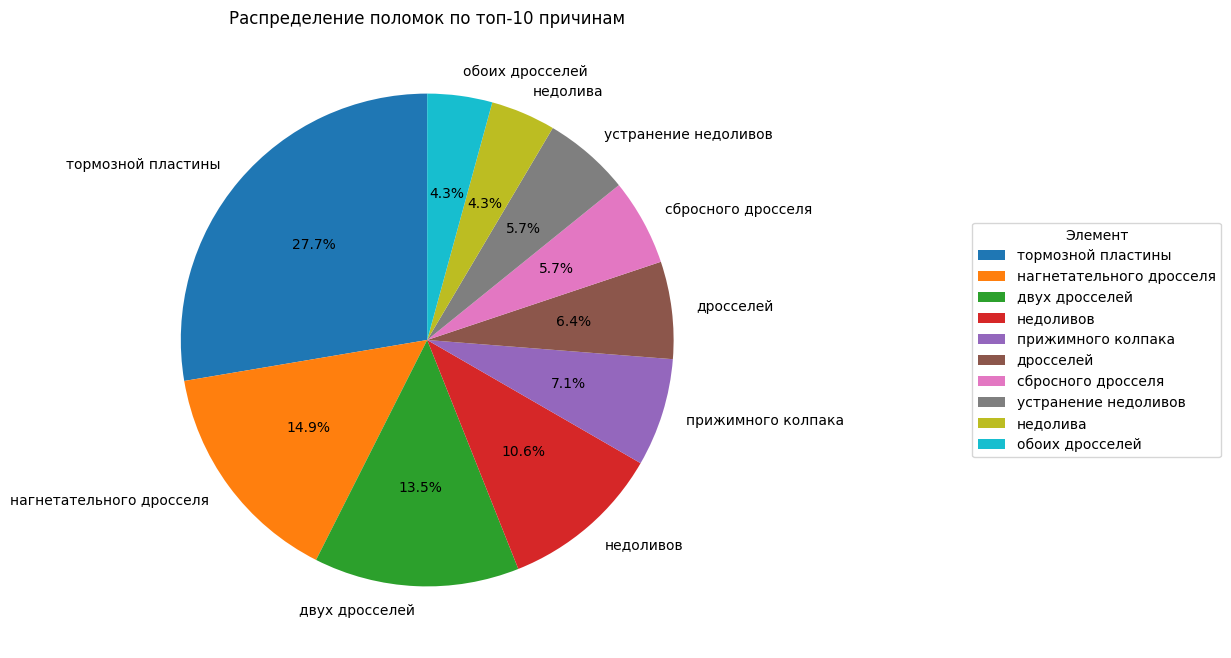

In [372]:
# Подсчет частоты поломок для каждого типа элемента
frequency_by_element = data['Элемент'].value_counts()

# Топ-10 наиболее часто встречающихся причин поломок
top_10_elements = frequency_by_element.head(10)

print("Топ-10 наиболее часто встречающихся причин поломок:")
print(top_10_elements)

plt.figure(figsize=(15, 8))
sns.barplot(x=top_10_elements.values, y=top_10_elements.index, palette='viridis')
plt.title('Топ-10 наиболее часто встречающихся причин поломок')
plt.xlabel('Количество поломок')
plt.ylabel('Элемент')
plt.show()

plt.figure(figsize=(20, 8))
top_10_elements.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=top_10_elements.index, legend=True)
plt.title('Распределение поломок по топ-10 причинам')
plt.legend(title="Элемент", loc="right", bbox_to_anchor=(1.3, 0, 0.5, 1))
plt.ylabel('')
plt.show()

## Подмешивание шума  

Подмешаем нормальный шум в даннные таким образом, чтобы были в интвервалах не только поломки, но и нормальные данные. Это необходимо для классификационной модели по полмкам

In [376]:
data.reset_index(inplace=True)

In [ ]:

# сгенерируем данные

from datetime import timedelta

normal_periods = []

for i in range(len(data) - 1):
    end_of_breakdown = data.loc[i, 'Конец простоя']
    start_of_next_breakdown = data.loc[i + 1, 'Начало простоя']
    
    # Если между поломками есть разрыв, создаем нормальные периоды
    if start_of_next_breakdown > end_of_breakdown:
        current_time = end_of_breakdown
        step = timedelta(minutes=30)  # Шаг для создания нормальных периодов (например, 30 минут)
        
        while current_time + step <= start_of_next_breakdown:
            normal_start = current_time
            normal_end = current_time + step
            normal_periods.append((normal_start, normal_end))
            current_time += step

normal_df = pd.DataFrame(normal_periods, columns=['Начало простоя', 'Конец простоя'])

normal_df['Метка'] = 'Нормальный'

data['Метка'] = 'Поломка'

combined_df = pd.concat([data[['Начало простоя', 'Конец простоя', 'Метка']], normal_df], ignore_index=True)



,Начало простоя,Конец простоя,Метка
0,2020-01-08 02:04:44,2020-01-08 02:08:29,Поломка
1,2020-01-28 09:11:45,2020-01-28 09:20:46,Поломка
2,2020-02-05 10:40:01,2020-02-05 10:42:23,Поломка
3,2020-02-06 10:59:58,2020-02-06 11:04:09,Поломка
4,2020-02-06 19:02:48,2020-02-06 19:05:07,Поломка
...,...,...,...
84709,2024-11-04 16:37:21,2024-11-04 17:07:21,Нормальный
84710,2024-11-04 17:07:21,2024-11-04 17:37:21,Нормальный
84711,2024-11-04 17:37:21,2024-11-04 18:07:21,Нормальный
84712,2024-11-04 18:07:21,2024-11-04 18:37:21,Нормальный


In [381]:
combined_df.sort_values('Начало простоя')

,Начало простоя,Конец простоя,Метка
0,2020-01-08 02:04:44,2020-01-08 02:08:29,Поломка
243,2020-01-08 02:08:29,2020-01-08 02:38:29,Нормальный
244,2020-01-08 02:38:29,2020-01-08 03:08:29,Нормальный
245,2020-01-08 03:08:29,2020-01-08 03:38:29,Нормальный
246,2020-01-08 03:38:29,2020-01-08 04:08:29,Нормальный
...,...,...,...
84710,2024-11-04 17:07:21,2024-11-04 17:37:21,Нормальный
84711,2024-11-04 17:37:21,2024-11-04 18:07:21,Нормальный
84712,2024-11-04 18:07:21,2024-11-04 18:37:21,Нормальный
84713,2024-11-04 18:37:21,2024-11-04 19:07:21,Нормальный


In [ ]:
# проведём балансировку

from sklearn.utils import resample

# Разделяем данные на классы
breakdown_data = combined_df[combined_df['Метка'] == 'Поломка']
normal_data = combined_df[combined_df['Метка'] == 'Нормальный']


normal_downsampled = resample(
    normal_data,
    replace=False, 
    n_samples=len(breakdown_data),  
    random_state=42
)

balanced_df = pd.concat([breakdown_data, normal_downsampled], ignore_index=True)


balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_df.head())

       Начало простоя       Конец простоя       Метка
0 2024-03-07 18:01:53 2024-03-07 18:31:53  Нормальный
1 2020-05-19 14:19:06 2020-05-19 14:49:06  Нормальный
2 2021-12-17 21:44:06 2021-12-17 22:14:06  Нормальный
3 2023-10-14 01:30:29 2023-10-14 02:00:29  Нормальный
4 2023-01-14 22:19:18 2023-01-14 22:49:18  Нормальный


In [ ]:
# навелём суету

def add_noise_to_timestamps(timestamps, noise_level=5):
    """
    Добавляет случайный шум к временным меткам.
    :param timestamps: Pandas Series с временными метками.
    :param noise_level: Максимальное отклонение в минутах.
    :return: Pandas Series с измененными временными метками.
    """
    return timestamps + pd.to_timedelta(np.random.uniform(-noise_level, noise_level, size=len(timestamps)), unit='m')

# Применяем функцию к нормальным периодам
balanced_df.loc[balanced_df['Метка'] == 'Нормальный', 'Начало простоя'] = \
    add_noise_to_timestamps(balanced_df.loc[balanced_df['Метка'] == 'Нормальный', 'Начало простоя'])

balanced_df.loc[balanced_df['Метка'] == 'Нормальный', 'Конец простоя'] = \
    add_noise_to_timestamps(balanced_df.loc[balanced_df['Метка'] == 'Нормальный', 'Конец простоя'])

print(balanced_df.head())

                 Начало простоя                 Конец простоя       Метка
0 2024-03-07 18:03:53.853919778 2024-03-07 18:29:14.566653722  Нормальный
1 2020-05-19 14:19:54.387013860 2020-05-19 14:47:45.975489840  Нормальный
2 2021-12-17 21:47:28.014777564 2021-12-17 22:14:51.352879926  Нормальный
3 2023-10-14 01:33:15.077651804 2023-10-14 01:59:07.755591584  Нормальный
4 2023-01-14 22:22:01.290943140 2023-01-14 22:49:12.140510340  Нормальный


In [ ]:
# переизвлеём признаки

# Извлекаем признаки
balanced_df['Час'] = balanced_df['Начало простоя'].dt.hour
balanced_df['День недели'] = balanced_df['Начало простоя'].dt.dayofweek
balanced_df['Продолжительность'] = (balanced_df['Конец простоя'] - balanced_df['Начало простоя']).dt.total_seconds() / 60  # В минутах

# Вычисляем время с последней поломки
balanced_df = balanced_df.sort_values(by='Начало простоя').reset_index(drop=True)
balanced_df['Время с последней поломки'] = (
    balanced_df['Начало простоя'] - balanced_df['Конец простоя'].shift(1)
).dt.total_seconds() / 60  # В минутах

# Заполнение NaN для первой строки
balanced_df['Время с последней поломки'].fillna(0, inplace=True)


In [385]:
balanced_df

,Начало простоя,Конец простоя,Метка,Час,День недели,Продолжительность,Время с последней поломки
0,2020-01-08 02:04:44.000000000,2020-01-08 02:08:29.000000000,Поломка,2,2,3.750000,0.000000
1,2020-01-21 16:11:24.434673686,2020-01-21 16:38:31.899691208,Нормальный,16,1,27.124417,19562.923911
2,2020-01-28 09:11:45.000000000,2020-01-28 09:20:46.000000000,Поломка,9,1,9.016667,9633.218338
3,2020-02-03 01:20:46.291261060,2020-02-03 01:48:54.689303884,Нормальный,1,0,28.139967,8160.004854
4,2020-02-05 10:40:01.000000000,2020-02-05 10:42:23.000000000,Поломка,10,2,2.366667,3411.105178
...,...,...,...,...,...,...,...
481,2024-10-20 10:30:09.425430110,2024-10-20 11:08:12.058390964,Нормальный,10,6,38.043883,4677.485763
482,2024-10-25 20:02:39.836155604,2024-10-25 20:35:49.386348704,Нормальный,20,4,33.159170,7734.462963
483,2024-10-27 19:33:35.987748140,2024-10-27 20:03:49.360858166,Нормальный,19,6,30.222885,2817.776690
484,2024-11-04 16:04:20.000000000,2024-11-04 16:07:21.000000000,Поломка,16,0,3.016667,11280.510652


In [ ]:
balanced_df.to_excel('content/balanced_data_with_features.xlsx', index=False)

ValueError: No engine for filetype: 'csv'

# Текстовый анализ

In [ ]:
df = pd.read_excel('/content/Данные от экспертов.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '/content/Данные от экспертов.xlsx'

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
352,4.383333,NaN,Санитарные регламенты,Внешние мойки,Ополаскивание укупора и розлива
353,3.916666,NaN,Организационные,Проверки по качеству,Лабораторные проверки
354,146.95,NaN,Переналадки,Переход через щ. СИП,Продукт СИП щ. продукт
355,2.35,NaN,Переналадки,Переход через щ. СИП,Продукт СИП щ. продукт


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/beer_features.xlsx', header=3).dropna(axis=1, how='all')
main_features = pd.read_excel('/content/beer_features_main.xlsx', header=3).dropna(axis=1, how='all')

In [ ]:
main_features['Статус'] =  main_features['Статус'].astype('category').cat.codes

In [ ]:
from datetime import datetime

main_features['Время начала интервала'] = main_features['Время начала интервала'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y %H:%M'))
main_features['День недели'] = main_features['Время начала интервала'].dt.weekday

In [ ]:
def categorize_time(hour):
    if 5 <= hour < 12:
        return 0
    elif 12 <= hour < 17:
        return 1
    elif 17 <= hour < 22:
        return 2
    else:
        return 3

# Apply the function to create a new column with time categories
main_features['Время дня'] = main_features['Время начала интервала'].apply(lambda x: x.hour).apply(categorize_time)

In [ ]:
df

,Линия,Дата,Смена,Время начала интервала,Время окончания интервала,Длительность,Простои,Причина,Общее описание,код причины,Детальное описание,Оборудование (ID в Монолите),Оборудование,Компонент,№ тех заявки (PMN заявки),Симптом,Код причины,Комментарий PMN,Статус тех заявки (PNM)
0,CL4,01/07/2024,Дневная (08:00-20:00 ),01/07/2024 11:35:08,01/07/2024 11:55:33,20.416666,Переналадки,Переход продукт вода продукт,Переход продукт вода продукт + АПМ,2214102,переход,1000132103,Блок розлива,Розлив,50211857,Симптом,1.000132e+09,переход,sent
1,CL4,01/07/2024,Дневная (08:00-20:00 ),01/07/2024 15:52:59,01/07/2024 16:14:41,21.700000,Переналадки,Переход продукт вода продукт,Переход продукт вода продукт + АПМ,2214102,переход,1000132103,Блок розлива,Розлив,50211878,Симптом,1.000132e+09,переход,sent
2,CL4,01/07/2024,Дневная (08:00-20:00 ),01/07/2024 17:52:22,01/07/2024 18:21:48,29.433333,Прочие внеплановые простои,Загруженность склада,Съем ГП,2112001,нет сьема,1000132103,Блок розлива,Розлив,50211893,Симптом,1.000132e+09,нет сьема,sent
3,CL4,01/07/2024,Дневная (08:00-20:00 ),01/07/2024 18:22:22,01/07/2024 18:31:06,8.733333,Прочие внеплановые простои,Загруженность склада,Съем ГП,2112001,нет сьема,1000132103,Блок розлива,Розлив,NaN,NaN,NaN,NaN,NaN
4,CL4,01/07/2024,Дневная (08:00-20:00 ),01/07/2024 18:51:42,01/07/2024 18:54:03,2.350000,Прочие внеплановые простои,Загруженность склада,Съем ГП,2112001,нет сьема,1000132103,Блок розлива,Розлив,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,CL4,30/07/2024,Дневная (08:00-20:00 ),30/07/2024 19:11:29,30/07/2024 19:15:52,4.383333,Санитарные регламенты,Внешние мойки,Ополаскивание укупора и розлива,2310502,Обл.гор. водой,1000132103,Блок розлива,Автомат укупорочный,NaN,NaN,NaN,NaN,NaN
342,CL4,30/07/2024,Ночная (20:00-08:00 ),30/07/2024 21:05:44,30/07/2024 21:09:39,3.916666,Организационные,Проверки по качеству,Лабораторные проверки,2512701,Отбор проб.,1000132103,Блок розлива,Розлив,50214882,Симптом,1.000132e+09,Отбор проб.,sent
343,CL4,30/07/2024,Ночная (20:00-08:00 ),30/07/2024 21:42:00,31/07/2024 00:08:57,146.950000,Переналадки,Переход через щ. СИП,Продукт СИП щ. продукт,2214201,Переход на FLash. СИП. АПМ.,1000132103,Блок розлива,Розлив,50214887,Симптом,1.000132e+09,Переход на FLash. СИП. АПМ.,sent
344,CL4,30/07/2024,Ночная (20:00-08:00 ),31/07/2024 00:09:34,31/07/2024 00:11:55,2.350000,Переналадки,Переход через щ. СИП,Продукт СИП щ. продукт,2214201,Переход на FLash. СИП. АПМ.,1000132103,Блок розлива,Розлив,NaN,NaN,NaN,NaN,NaN


In [ ]:
main_features

,Время начала интервала,Время окончания интервала,Длительность,Линия,Оборудование,Статус,День недели,Время дня
0,2024-07-01 08:00:00,01/07/2024 08:13,13.400000,CL4,Блок розлива (CL4),10,0,0
1,2024-07-01 08:13:00,01/07/2024 08:13,0.183333,CL4,Блок розлива (CL4),1,0,0
2,2024-07-01 08:13:00,01/07/2024 08:18,4.433333,CL4,Блок розлива (CL4),9,0,0
3,2024-07-01 08:18:00,01/07/2024 09:17,59.100000,CL4,Блок розлива (CL4),10,0,0
4,2024-07-01 09:17:00,01/07/2024 09:18,1.016666,CL4,Блок розлива (CL4),2,0,0
...,...,...,...,...,...,...,...,...
6639,2024-07-31 00:18:00,31/07/2024 00:48,30.016666,CL4,Блок розлива (CL4),10,2,3
6640,2024-07-31 00:48:00,31/07/2024 00:50,2.000000,CL4,Блок розлива (CL4),9,2,3
6641,2024-07-31 00:50:00,31/07/2024 01:21,31.516666,CL4,Блок розлива (CL4),10,2,3
6642,2024-07-31 01:21:00,31/07/2024 01:22,0.316666,CL4,Блок розлива (CL4),9,2,3


In [ ]:
sum(df['Длительность']) / sum(main_features['Длительность'])

0.28704206373781055

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(main_features[['Длительность', 'День недели', 'Время дня']], main_features['Статус'], test_size=0.2, random_state=42)

In [ ]:
# !pip install catboost
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=False) # Suppress verbose output

# Fit model
model.fit(X_train, y_train, cat_features=['День недели', 'Время дня'])

# Get predictions
preds = model.predict(X_test).flatten()
print(preds)

[ 9 10  8 ... 10  8  9]


In [ ]:
from sklearn.metrics import f1_score
#не кодируя 'День недели', 'Время дня' как категориальные признаки
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))

0.20296031988219954
0.5003762227238525


In [ ]:
#кодируя 'День недели', 'Время дня' как категориальные признаки
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))

0.18501793272690212
0.5116629044394282


In [ ]:
prostoi = pd.get_dummies(df['Простои'])
prichina = pd.get_dummies(df['Причина'])
obshee_opisanie = pd.get_dummies(df['Общее описание'])
component = pd.get_dummies(df['Компонент'])
# print(len(df['Простои'].unique()))
# print(len(df['Причина'].unique()))
# print(len(df['Общее описание'].unique()))
# print(len(df['Детальное описание'].unique()))
# print(len(df['Компонент'].unique()))


146
3


In [ ]:
obshee_opisanie

,АПМ (Пенная санитарная обработка),Дезинфекция,Изм-е дизайна (цвета/печати/акциз),Лабораторные проверки,Малые остановки,Ополаскивание укупора и розлива,Отсутствие заявок,ПТО,Переход продукт вода продукт,Переход продукт вода продукт + АПМ,...,Прогон в 00:00 часов,Продукт СИП щ-к продукт,Продукт СИП щ. продукт,Продукт стерил. продукт,Смена дизайна (экспорт/промо),Смена расходных материалов,Съем ГП,"Та же машина, разное кол-во рядов, разное кол-во шт.",Тесты материалов,Услуги подрядных организаций
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
342,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
343,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
344,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
